In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import json
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


%matplotlib inline

In [180]:
path = '/Volumes/GoogleDrive/My Drive/wish_local/DSF-1436 Fusion Incrementality Analysis/'
df = pd.read_csv(path+'data/dsf1436_daily_experiment_by_day_longer.csv')#, parse_dates=['month'])
df.shape

(16754, 25)

In [3]:
fusion_countries = ('US', 'GB', 'FR', 'DE', 'IT', 'MX', 'BR', 'ES', 'PT')
# JP does not have Fusion. just use it to check if holdout assignment it unbiased.

In [121]:
df = pd.read_csv(path+'data/dsf1436_daily_experiment_by_day_longer.csv')#, parse_dates=['month'])
df = df.rename(columns={'country_code': 'country'})
df = df[df['country'].apply(lambda x: x in fusion_countries)].sort_values(['country', 'week', 'bucket'])
# ios = ios.sort_values(['country', 'month', 'bucket'])
df.head()

,week,country,bucket,dusers0,dusers,order_users,order_nusers,avg_orders,std_orders,avg_gmv,std_gmv,avg_price_rev,std_price_rev,orders_2,orders_5,orders_10,orders_20,orders_30,orders_50,fusion_orders_2,fusion_orders_5,fusion_orders_10,fusion_orders_20,fusion_orders_30,fusion_orders_50
12036,2021-03-29,BR,android_control,158771,158771,3137,311,0.050853,0.580330,0.342032,4.804691,0.104690,1.565997,865,6324,7253,7713,7918,8029,1,19,21,21,21,21
11530,2021-03-29,BR,android_control_ios_control,1311,1311,13,0,0.063310,1.614613,0.239304,5.306695,0.059785,0.974229,8,80,82,83,83,83,0,0,0,0,0,0
11453,2021-03-29,BR,android_control_ios_show,24175,24175,298,0,0.040951,0.655687,0.254116,4.430149,0.082460,1.659142,96,796,890,952,977,988,4,26,26,27,29,29
10858,2021-03-29,BR,android_show,3009574,3009574,60382,6004,0.051921,0.573167,0.344400,5.462635,0.103266,1.690270,16580,122639,140982,149799,153378,155448,1309,10964,12089,12592,12813,12889
9270,2021-03-29,BR,android_show_ios_control,24273,24273,263,1,0.035183,0.537704,0.309980,6.798961,0.096472,2.087181,81,637,744,792,825,847,3,29,34,37,41,43


In [122]:
df.groupby(['country', 'bucket'])['week'].unique().iloc[4]

array(['2021-03-29', '2021-04-05', '2021-04-12', '2021-04-19',
       '2021-04-26', '2021-05-03', '2021-05-10', '2021-05-17',
       '2021-05-24', '2021-05-31', '2021-06-07', '2021-06-14',
       '2021-06-21', '2021-06-28', '2021-07-05', '2021-07-12',
       '2021-07-19', '2021-07-26', '2021-08-02', '2021-08-09',
       '2021-08-16', '2021-08-23', '2021-08-30', '2021-09-06'],
      dtype=object)

In [123]:
df['order_users_pct'] = df['order_users'] / df['dusers']
df[df['country']=='US'].groupby(['country', 'week', 'bucket']).agg(\
                                        {'dusers':['sum'], \
                                         'order_users_pct':['sum'], \
                                         'avg_orders':['mean'],\
                                         'avg_gmv':['mean']}).tail(30)

dusers order_users_pct  \
                                                    sum             sum   
country week       bucket                                                 
US      2021-08-16 android_control_ios_show       98461        0.019734   
                   android_show                 3870794        0.055756   
                   android_show_ios_control       99767        0.020598   
                   android_show_ios_show        1876780        0.019547   
                   ios_control                   224627        0.026991   
                   ios_show                     4230145        0.026068   
        2021-08-23 android_control               194312        0.054238   
                   android_control_ios_control     4028        0.023337   
                   android_control_ios_show       77690        0.022809   
                   android_show                 3715086        0.054355   
                   android_show_ios_control       78298        0.023743   
                   android_show_ios_show        1475338        0.023558   
                   ios_control                   224721        0.025258   
                   ios_show                     4237810        0.024891   
        2021-08-30 android_control               189787        0.062038   
                   android_control_ios_control     4486        0.024744   
                   android_control_ios_show       84430        0.022338   
                   android_show                 3616501        0.062342   
                   android_show_ios_control       85109        0.023053   
                   android_show_ios_show        1613525        0.022425   
                   ios_control                   210389        0.026337   
                   ios_show                     3971647        0.026176   
        2021-09-06 android_control               159642        0.060260   
                   android_control_ios_control     8931        0.010413   
                   android_control_ios_show      171360        0.008940   
                   android_show                 3042858        0.059683   
                   android_show_ios_control      171278        0.009149   
                   android_show_ios_show        3262383        0.009233   
                   ios_control                   175831        0.026537   
                   ios_show                     3314528        0.026039   

                                               avg_orders   avg_gmv  
                                                     mean      mean  
country week       bucket                                            
US      2021-08-16 android_control_ios_show      0.068870  0.929641  
                   android_show                  0.204852  2.739862  
                   android_show_ios_control      0.073191  0.960616  
                   android_show_ios_show         0.071319  0.924906  
                   ios_control                   0.093782  1.258524  
                   ios_show                      0.095851  1.281626  
        2021-08-23 android_control               0.197831  2.677428  
                   android_control_ios_control   0.077458  0.891797  
                   android_control_ios_show      0.083666  1.101480  
                   android_show                  0.203689  2.703243  
                   android_show_ios_control      0.085711  1.188895  
                   android_show_ios_show         0.086226  1.145564  
                   ios_control                   0.092590  1.256719  
                   ios_show                      0.092571  1.239072  
        2021-08-30 android_control               0.235701  3.190756  
                   android_control_ios_control   0.095631  1.361271  
                   android_control_ios_show      0.081464  1.066492  
                   android_show                  0.245937  3.280644  
                   android_show_ios_control      0.091107  1.225880  
                   android_show_i

In [124]:
df = df[(df['bucket'].apply(\
        lambda x: x in ['android_control', 'android_show', 'ios_control', 'ios_show'])) & \
        (df['week'].apply(lambda x: x >= '2021-04-05' and x <= '2021-09-06'))
       ].copy(deep=True)

In [125]:
df.shape

(828, 26)

# proportion of dau who place order(s) and who click pdp

In [126]:
prop = df[['country', 'week', 'bucket', 'dusers', 'order_users']].copy(deep=True)
prop['order_users_pct'] = prop['order_users'] / prop['dusers']


## calculate diff

In [151]:
def show_control_diff(x, data, c, diff_pct=False):
    """
    x: row
    data: original dataframe
    c: column to calculate diff
    diff_pct: False is return absoluate diff, True is to return diff %
    """
    if 'control' in x['bucket']:
        return
    if 'show' in x['bucket']:
#         try:
        control_value = data[(data['week']==x['week']) & \
                             (data['country']==x['country']) & \
                             (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_control'))][c].iloc[0]
        show_value = x[c]
        if diff_pct:
            return (show_value - control_value) / control_value
        else:
            return show_value - control_value
#         except:
#             print(x)

In [152]:
prop

,country,week,bucket,dusers,order_users,order_users_pct,order_users_pct_diff,order_users_pct_pval
9736,BR,2021-04-05,android_control,231379,6159,0.026619,nan,NaN
8546,BR,2021-04-05,android_show,4384890,111192,0.025358,-0.13%***,0.00
15874,BR,2021-04-05,ios_control,48400,1218,0.025165,nan,NaN
9432,BR,2021-04-05,ios_show,923064,21554,0.023350,-0.18%***,0.01
5850,BR,2021-04-12,android_control,229670,5819,0.025336,nan,NaN
...,...,...,...,...,...,...,...,...
11631,US,2021-08-30,ios_show,3971647,103962,0.026176,-0.02%,0.65
8367,US,2021-09-06,android_control,159642,9620,0.060260,nan,NaN
7192,US,2021-09-06,android_show,3042858,181607,0.059683,-0.06%,0.34
14489,US,2021-09-06,ios_control,175831,4666,0.026537,nan,NaN


In [153]:
for c in ['order_users_pct']:
    prop[c+'_diff'] = prop.apply(lambda x: \
                show_control_diff(x, prop, c, diff_pct=False), axis=1)
temp = list(zip(['order_users_pct'], \
                [c+'_diff' for c in ['order_users_pct']]))
temp_cols = [l1 for l2 in temp for l1 in l2]
prop[['country', 'week', 'bucket', 'dusers'] + temp_cols]

,country,week,bucket,dusers,order_users_pct,order_users_pct_diff
9736,BR,2021-04-05,android_control,231379,0.026619,NaN
8546,BR,2021-04-05,android_show,4384890,0.025358,-0.001261
15874,BR,2021-04-05,ios_control,48400,0.025165,NaN
9432,BR,2021-04-05,ios_show,923064,0.023350,-0.001815
5850,BR,2021-04-12,android_control,229670,0.025336,NaN
...,...,...,...,...,...,...
11631,US,2021-08-30,ios_show,3971647,0.026176,-0.000161
8367,US,2021-09-06,android_control,159642,0.060260,NaN
7192,US,2021-09-06,android_show,3042858,0.059683,-0.000577
14489,US,2021-09-06,ios_control,175831,0.026537,NaN


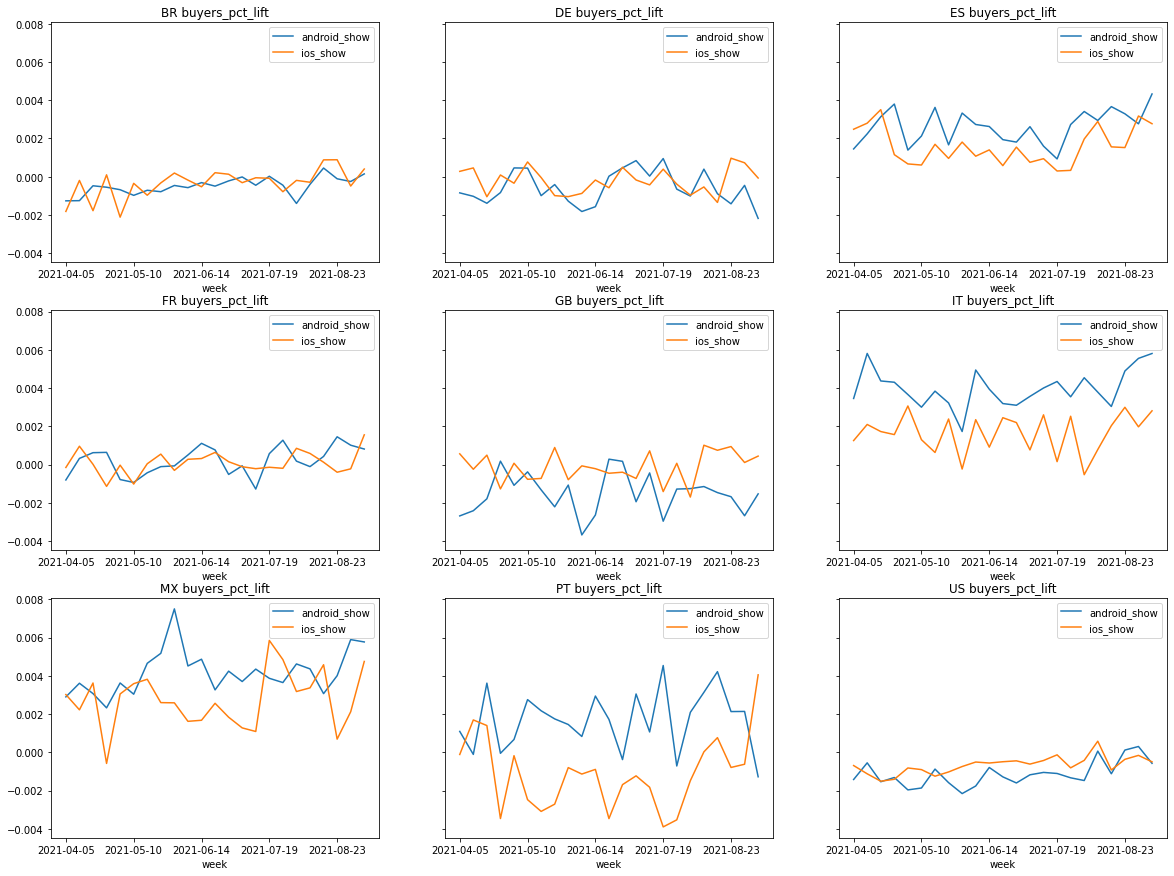

In [172]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,15), sharey=True)
countries = prop['country'].unique()
for i in range(len(countries)):
    c = countries[i]
    temp = prop[prop['order_users_pct_diff'].notna()].groupby(\
        ['country', 'week', 'bucket'])['order_users_pct_diff'].mean().loc[c].unstack([1])#
    temp.plot(ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(c+' '+'buyers_pct_lift')
    _ = ax[i//3, i%3].legend()

## proportion test

In [131]:
from statsmodels.stats.proportion import proportions_ztest
# https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportions_ztest.html

def show_control_prop_test(x, data, pct_col, nobs_col, is_count=False, alternative='two-sided'):
    """
    x: row
    data: original dataframe
    pct_col: column name of numerator or the percentage calcualted
    nobs_col: column name of denominator
    is_count: False if pct_col is percentage, True if pct_col is the integer (numerator)
    """
    if 'control' in x['bucket']:
        return
    if 'show' in x['bucket']:
        n_control = data[(data['week']==x['week']) & \
                         (data['country']==x['country']) & \
                        (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_control'))][nobs_col].iloc[0]
        n_show = x[nobs_col]
        if is_count: 
            count_control = data[(data['week']==x['week']) & \
                                 (data['country']==x['country']) & \
                                 (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_control'))][pct_col].iloc[0]
            count_show = x[pct_col]
        else:
            count_control = int(round(data[(data['week']==x['week']) & \
                                           (data['country']==x['country']) & \
                                     (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_control'))][pct_col].iloc[0] * n_control,0))
            count_show = int(round(x[pct_col] * n_show, 0))
        
        stat, pval = proportions_ztest((count_control,count_show), (n_control,n_show), alternative=alternative)
        
        return round(pval, 2)

In [132]:
for c in ['order_users_pct']:
    prop[c+'_pval'] = prop.apply(lambda x: \
         show_control_prop_test(x, prop, c, 'dusers', is_count=False, alternative='two-sided')
         , axis=1)
    prop[c+'_diff'] = prop.apply(lambda x: f"{round(x[c+'_diff']*100, 2)}" + \
                             ("" if np.isnan(x[c+'_diff']) else "%") + \
                             ('***' if x[c+'_pval']<=0.05 else ''), axis=1)
    

temp = zip(['order_users_pct'], [c+'_diff' for c in ['order_users_pct']])#, [c+'_test' for c in prop_cols])
temp_cols = [l1 for l2 in temp for l1 in l2]

prop[['week', 'bucket', 'dusers']+temp_cols]#.to_clipboard()

,week,bucket,dusers,order_users_pct,order_users_pct_diff
9736,2021-04-05,android_control,231379,0.026619,nan
8546,2021-04-05,android_show,4384890,0.025358,-0.13%***
15874,2021-04-05,ios_control,48400,0.025165,nan
9432,2021-04-05,ios_show,923064,0.023350,-0.18%***
5850,2021-04-12,android_control,229670,0.025336,nan
...,...,...,...,...,...
11631,2021-08-30,ios_show,3971647,0.026176,-0.02%
8367,2021-09-06,android_control,159642,0.060260,nan
7192,2021-09-06,android_show,3042858,0.059683,-0.06%
14489,2021-09-06,ios_control,175831,0.026537,nan


In [133]:
def color_pval(x):
    if '*' in str(x):
        if '-' in str(x):
            return "background-color: pink"
        else:
            return "background-color: lightgreen"
    return "background-color: white"

prop[['country', 'week', 'bucket', 'dusers']+temp_cols].reset_index().style.applymap(color_pval)

,index,country,week,bucket,dusers,order_users_pct,order_users_pct_diff
0,9736,BR,2021-04-05,android_control,231379,0.026619,nan
1,8546,BR,2021-04-05,android_show,4384890,0.025358,-0.13%***
2,15874,BR,2021-04-05,ios_control,48400,0.025165,nan
3,9432,BR,2021-04-05,ios_show,923064,0.023350,-0.18%***
4,5850,BR,2021-04-12,android_control,229670,0.025336,nan
5,4647,BR,2021-04-12,android_show,4350891,0.024085,-0.13%***
6,11963,BR,2021-04-12,ios_control,47176,0.022024,nan
7,5530,BR,2021-04-12,ios_show,897740,0.021829,-0.02%
8,711,BR,2021-04-19,android_control,239449,0.024013,nan
9,16267,BR,2021-04-19,android_show,4531276,0.023540,-0.05%


In [52]:
prop[['country', 'week', 'bucket', 'dusers']+temp_cols].reset_index().to_clipboard()

In [51]:
prop[prop['country']=='IT'][['country', 'week', 'bucket', 'dusers']+temp_cols].reset_index().style.applymap(color_pval)

,index,country,week,bucket,dusers,order_users_pct,order_users_pct_diff
0,4993,IT,2021-04-05,android_control,158582,0.039960,nan
1,3810,IT,2021-04-05,android_show,3111090,0.043414,0.35%***
2,11112,IT,2021-04-05,ios_control,59636,0.032346,nan
3,4665,IT,2021-04-05,ios_show,1155496,0.033599,0.13%
4,1156,IT,2021-04-12,android_control,155351,0.037727,nan
5,16680,IT,2021-04-12,android_show,3055261,0.043535,0.58%***
6,7240,IT,2021-04-12,ios_control,58977,0.030130,nan
7,821,IT,2021-04-12,ios_show,1147773,0.032225,0.21%***
8,12731,IT,2021-04-19,android_control,154444,0.035851,nan
9,11494,IT,2021-04-19,android_show,3031756,0.040221,0.44%***


# Avg orders, gmv, pdp and imp per dau

In [173]:
og_cols = ['avg_orders',
             'std_orders',
             'avg_gmv',
             'std_gmv',]
#              'avg_pdp',
#              'std_pdp',]
#              'avg_imp',
#              'std_imp']

In [174]:
og = df[['country', 'week', 'bucket', 'dusers']+og_cols].copy(deep=True)
og

,country,week,bucket,dusers,avg_orders,std_orders,avg_gmv,std_gmv
9736,BR,2021-04-05,android_control,231379,0.068502,0.635376,0.469745,7.070358
8546,BR,2021-04-05,android_show,4384890,0.064721,0.640246,0.439784,6.218157
15874,BR,2021-04-05,ios_control,48400,0.076178,0.810598,0.578484,7.310745
9432,BR,2021-04-05,ios_show,923064,0.073892,0.819206,0.580570,8.312733
5850,BR,2021-04-12,android_control,229670,0.063369,0.617814,0.464975,7.226357
...,...,...,...,...,...,...,...,...
11631,US,2021-08-30,ios_show,3971647,0.099773,1.057309,1.339173,15.817945
8367,US,2021-09-06,android_control,159642,0.220287,1.486205,2.925367,21.700065
7192,US,2021-09-06,android_show,3042858,0.226724,1.571141,2.982585,23.018733
14489,US,2021-09-06,ios_control,175831,0.100631,1.149577,1.289316,14.177400


## calculate diff

In [175]:
for c in og_cols:
    og[c+'_diff'] = og.apply(lambda x: show_control_diff(x, og, c, diff_pct=True), axis=1)
    
temp = zip(['avg_orders', 'avg_gmv'],\
           [c+'_diff' for c in ['avg_orders', 'avg_gmv']])
temp_cols = [l1 for l2 in temp for l1 in l2]

og[['country', 'week', 'bucket', 'dusers']+temp_cols].head(10)

,country,week,bucket,dusers,avg_orders,avg_orders_diff,avg_gmv,avg_gmv_diff
9736,BR,2021-04-05,android_control,231379,0.068502,NaN,0.469745,NaN
8546,BR,2021-04-05,android_show,4384890,0.064721,-0.055205,0.439784,-0.063782
15874,BR,2021-04-05,ios_control,48400,0.076178,NaN,0.578484,NaN
9432,BR,2021-04-05,ios_show,923064,0.073892,-0.030005,0.580570,0.003606
5850,BR,2021-04-12,android_control,229670,0.063369,NaN,0.464975,NaN
4647,BR,2021-04-12,android_show,4350891,0.059944,-0.054058,0.417956,-0.101122
11963,BR,2021-04-12,ios_control,47176,0.073554,NaN,0.559277,NaN
5530,BR,2021-04-12,ios_show,897740,0.067844,-0.077639,0.584755,0.045556
711,BR,2021-04-19,android_control,239449,0.059516,NaN,0.427326,NaN
16267,BR,2021-04-19,android_show,4531276,0.058894,-0.010440,0.421755,-0.013038


In [176]:
og[['country', 'week', 'bucket', 'dusers']+temp_cols].tail(40)

,country,week,bucket,dusers,avg_orders,avg_orders_diff,avg_gmv,avg_gmv_diff
10541,US,2021-07-05,android_control,306203,0.216252,NaN,2.783914,NaN
9360,US,2021-07-05,android_show,5806057,0.219439,0.014740,2.697888,-0.030901
16675,US,2021-07-05,ios_control,294119,0.093680,NaN,1.239429,NaN
10216,US,2021-07-05,ios_show,5564352,0.094407,0.007767,1.212325,-0.021868
6648,US,2021-07-12,android_control,268301,0.223521,NaN,2.874769,NaN
5457,US,2021-07-12,android_show,5092204,0.224487,0.004320,2.792610,-0.028579
12798,US,2021-07-12,ios_control,281106,0.094907,NaN,1.260183,NaN
6346,US,2021-07-12,ios_show,5318607,0.096695,0.018839,1.235583,-0.019522
1542,US,2021-07-19,android_control,258712,0.213767,NaN,2.728857,NaN
313,US,2021-07-19,android_show,4892602,0.214217,0.002105,2.683141,-0.016753


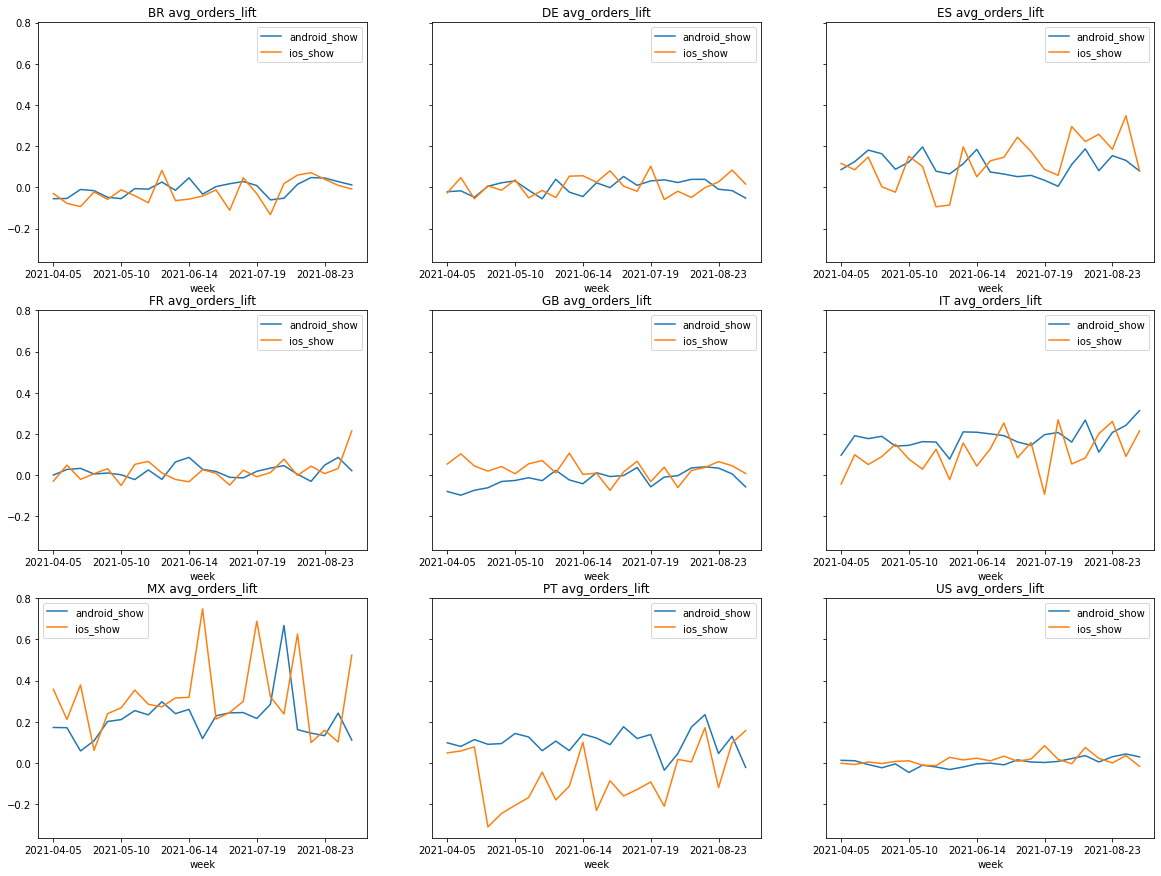

In [178]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,15), sharey=True)
countries = og['country'].unique()
for i in range(len(countries)):
    c = countries[i]
    temp = og[og['avg_orders_diff'].notna()].groupby(\
        ['country', 'week', 'bucket'])['avg_orders_diff'].mean().loc[c].unstack([1])#
    temp.plot(ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(c+' '+'avg_orders_lift')
    _ = ax[i//3, i%3].legend()

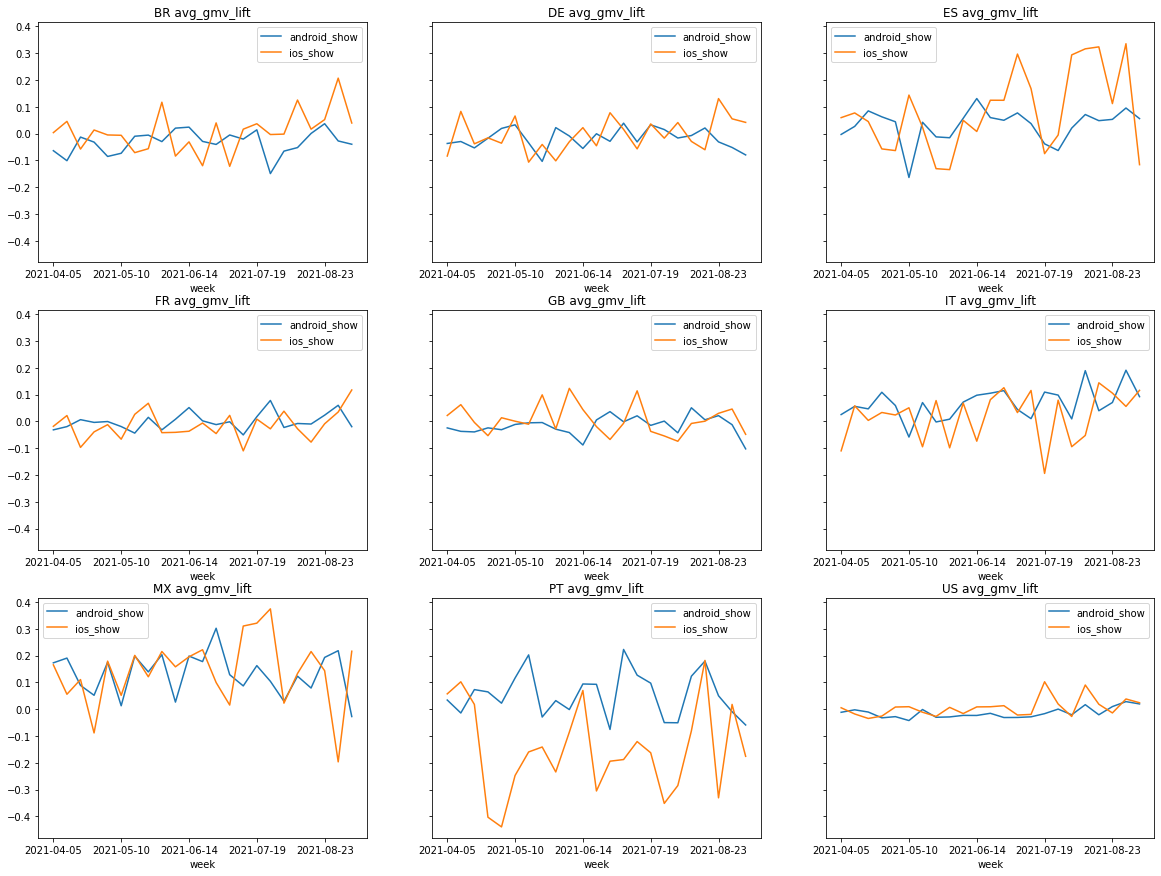

In [179]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,15), sharey=True)
countries = og['country'].unique()
for i in range(len(countries)):
    c = countries[i]
    temp = og[og['avg_gmv_diff'].notna()].groupby(\
        ['country', 'week', 'bucket'])['avg_gmv_diff'].mean().loc[c].unstack([1])#
    temp.plot(ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(c+' '+'avg_gmv_lift')
    _ = ax[i//3, i%3].legend()

## t test

In [140]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# https://github.com/scipy/scipy/blob/v1.7.1/scipy/stats/stats.py#L5879-

from scipy.stats import distributions

def _unequal_var_ttest_denom(v1, n1, v2, n2):
    vn1 = v1 / n1
    vn2 = v2 / n2
    with np.errstate(divide='ignore', invalid='ignore'):
        dof = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))

    # If dof is undefined, variances are zero (assumes n1 > 0 & n2 > 0).
    # Hence it doesn't matter what dof is as long as it's not NaN.
    dof = np.where(np.isnan(dof), 1, dof)
    denom = np.sqrt(vn1 + vn2)
    return dof, denom

def _ttest_finish(dof, t, alternative):
    """Common code between all 3 t-test functions."""
    if alternative == 'less':
        prob = distributions.t.cdf(t, dof)
    elif alternative == 'greater':
        prob = distributions.t.sf(t, dof)
    elif alternative == 'two-sided':
        prob = 2 * distributions.t.sf(np.abs(t), dof)
    else:
        raise ValueError("alternative must be "
                         "'less', 'greater' or 'two-sided'")
    return t, prob

def _ttest_ind_from_stats(mean1, mean2, denom, dof, alternative):

    d = mean1 - mean2
    with np.errstate(divide='ignore', invalid='ignore'):
        t = np.divide(d, denom)
    t, prob = _ttest_finish(dof, t, alternative)

    return (t, prob)



def unequal_var_ttest(v1, v2, n1, n2, m1, m2, alternative='two-sided'):
    dof, denom = _unequal_var_ttest_denom(v1, n1, v2, n2)
    t, pval = _ttest_ind_from_stats(m1, m2, denom, dof, alternative)
    
    return t, pval

In [141]:
def show_control_t_test(x, data, avg_col, std_col, n_col, alternative='two-sided'):
    """
    x: row
    data: original dataframe
    """
    if 'control' in x['bucket']:
        return
    if 'show' in x['bucket']:
        v_control = data[(data['week']==x['week']) & \
                         (data['country']==x['country']) & \
                        (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_control'))][std_col].iloc[0] ** 2
        v_show = x[std_col] ** 2
        
        n_control = data[(data['week']==x['week']) & \
                         (data['country']==x['country']) & \
                        (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_control'))][n_col].iloc[0]
        n_show = x[n_col]
        
        m_control = data[(data['week']==x['week']) & \
                         (data['country']==x['country']) & \
                        (data['bucket'].apply(lambda p: p == x['bucket'].split('_')[0]+'_control'))][avg_col].iloc[0]
        m_show = x[avg_col]
        
        t, pval = unequal_var_ttest(v_control, v_show, n_control, n_show, m_control, m_show, alternative)
        
        return round(pval, 4)


In [142]:
og

,country,week,bucket,dusers,avg_orders,std_orders,avg_gmv,std_gmv,avg_orders_diff,std_orders_diff,avg_gmv_diff,std_gmv_diff
9736,BR,2021-04-05,android_control,231379,0.068502,0.635376,0.469745,7.070358,NaN,NaN,NaN,NaN
8546,BR,2021-04-05,android_show,4384890,0.064721,0.640246,0.439784,6.218157,-0.055205,0.007665,-0.063782,-0.120532
15874,BR,2021-04-05,ios_control,48400,0.076178,0.810598,0.578484,7.310745,NaN,NaN,NaN,NaN
9432,BR,2021-04-05,ios_show,923064,0.073892,0.819206,0.580570,8.312733,-0.030005,0.010620,0.003606,0.137057
5850,BR,2021-04-12,android_control,229670,0.063369,0.617814,0.464975,7.226357,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11631,US,2021-08-30,ios_show,3971647,0.099773,1.057309,1.339173,15.817945,0.035727,0.085234,0.038054,0.083489
8367,US,2021-09-06,android_control,159642,0.220287,1.486205,2.925367,21.700065,NaN,NaN,NaN,NaN
7192,US,2021-09-06,android_show,3042858,0.226724,1.571141,2.982585,23.018733,0.029221,0.057149,0.019559,0.060768
14489,US,2021-09-06,ios_control,175831,0.100631,1.149577,1.289316,14.177400,NaN,NaN,NaN,NaN


In [143]:
for c in ['orders', 'gmv']:
    og[c+'_pval'] = og.apply(lambda x: \
                                 show_control_t_test(x, data=og, \
                                                     avg_col='avg_'+c, \
                                                     std_col='std_'+c, \
                                                     n_col='dusers', \
                                                     alternative='two-sided') , axis=1)

    og['avg_'+c+'_diff2'] = og.apply(lambda x: f"{round(x['avg_'+c+'_diff']*100, 2)}%" + \
                             ('***' if x[c+'_pval']<=0.05 else ''), axis=1)
    

temp = zip(['avg_orders', 'avg_gmv'], \
           [c+'_diff2' for c in ['avg_orders', 'avg_gmv']])#, [c+'_test' for c in og_cols])
temp_cols = [l1 for l2 in temp for l1 in l2]

og[['country', 'week', 'bucket', 'dusers']+temp_cols]

,country,week,bucket,dusers,avg_orders,avg_orders_diff2,avg_gmv,avg_gmv_diff2
9736,BR,2021-04-05,android_control,231379,0.068502,nan%,0.469745,nan%
8546,BR,2021-04-05,android_show,4384890,0.064721,-5.52%***,0.439784,-6.38%***
15874,BR,2021-04-05,ios_control,48400,0.076178,nan%,0.578484,nan%
9432,BR,2021-04-05,ios_show,923064,0.073892,-3.0%,0.580570,0.36%
5850,BR,2021-04-12,android_control,229670,0.063369,nan%,0.464975,nan%
...,...,...,...,...,...,...,...,...
11631,US,2021-08-30,ios_show,3971647,0.099773,3.57%,1.339173,3.81%
8367,US,2021-09-06,android_control,159642,0.220287,nan%,2.925367,nan%
7192,US,2021-09-06,android_show,3042858,0.226724,2.92%,2.982585,1.96%
14489,US,2021-09-06,ios_control,175831,0.100631,nan%,1.289316,nan%


In [34]:
og[og['country'].apply(lambda x: x in ['IT', 'ES', 'PT'])\
  ][['country', 'week', 'bucket', 'dusers']+temp_cols].reset_index().to_clipboard()

In [144]:
og[['country', 'week', 'bucket', 'dusers']+temp_cols].reset_index().style.applymap(color_pval)

,index,country,week,bucket,dusers,avg_orders,avg_orders_diff2,avg_gmv,avg_gmv_diff2
0,9736,BR,2021-04-05,android_control,231379,0.068502,nan%,0.469745,nan%
1,8546,BR,2021-04-05,android_show,4384890,0.064721,-5.52%***,0.439784,-6.38%***
2,15874,BR,2021-04-05,ios_control,48400,0.076178,nan%,0.578484,nan%
3,9432,BR,2021-04-05,ios_show,923064,0.073892,-3.0%,0.580570,0.36%
4,5850,BR,2021-04-12,android_control,229670,0.063369,nan%,0.464975,nan%
5,4647,BR,2021-04-12,android_show,4350891,0.059944,-5.41%***,0.417956,-10.11%***
6,11963,BR,2021-04-12,ios_control,47176,0.073554,nan%,0.559277,nan%
7,5530,BR,2021-04-12,ios_show,897740,0.067844,-7.76%,0.584755,4.56%
8,711,BR,2021-04-19,android_control,239449,0.059516,nan%,0.427326,nan%
9,16267,BR,2021-04-19,android_show,4531276,0.058894,-1.04%,0.421755,-1.3%
